In [1]:
from pathlib import Path
import pandas as pd


datadir = Path("data")


macro = pd.read_excel(
    datadir.joinpath("dados_camila.xlsx"),
    sheet_name="macroplastico",
)

In [2]:
macro.head()

,data,porção,itens_total,fragmento,bituca,isopor,filme,sacolas,embalagem alimentos,tampa plástica,...,ponta guarda-sol,esponja,eva,borracha,emabalgem palito de dente,esqueiro,escova de dente,copo,garrafa plástica,outros
0,19122018.0,deixa,27,7.0,2.0,NaN,4.0,0.0,3.0,NaN,...,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,3.0
1,19122018.0,duna,34,12.0,NaN,1.0,0.0,0.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3.0
2,22012019.0,deixa,5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22012019.0,duna,27,3.0,5.0,NaN,5.0,NaN,2.0,4.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
4,21022019.0,duna,3,NaN,1.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
macro["data"] = pd.to_datetime(macro["data"], format="%d%M%Y")

In [4]:
macro.set_index("data", inplace=True)

In [5]:
macro.head()

,porção,itens_total,fragmento,bituca,isopor,filme,sacolas,embalagem alimentos,tampa plástica,lacre.plástico,...,ponta guarda-sol,esponja,eva,borracha,emabalgem palito de dente,esqueiro,escova de dente,copo,garrafa plástica,outros
data,,,,,,,,,,,,,,,,,,,,,
2018-01-19 00:12:00,deixa,27,7.0,2.0,NaN,4.0,0.0,3.0,NaN,NaN,...,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,3.0
2018-01-19 00:12:00,duna,34,12.0,NaN,1.0,0.0,0.0,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3.0
2019-01-22 00:01:00,deixa,5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-22 00:01:00,duna,27,3.0,5.0,NaN,5.0,NaN,2.0,4.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
2019-01-21 00:02:00,duna,3,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


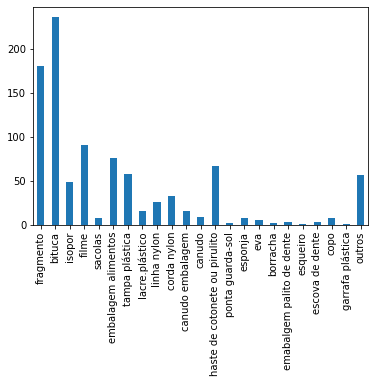

In [6]:
soma = macro.sum(axis=0)
itens = soma.drop(["porção", "itens_total"]) 

itens.plot.bar();

In [7]:
local = macro.groupby("porção").sum()

local

,itens_total,fragmento,bituca,isopor,filme,sacolas,embalagem alimentos,tampa plástica,lacre.plástico,linha nylon,...,ponta guarda-sol,esponja,eva,borracha,emabalgem palito de dente,esqueiro,escova de dente,copo,garrafa plástica,outros
porção,,,,,,,,,,,,,,,,,,,,,
deixa,207,48.0,30.0,12.0,24.0,0.0,16.0,7.0,1.0,14.0,...,0.0,3.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0,17.0
duna,708,130.0,197.0,32.0,67.0,1.0,56.0,48.0,15.0,11.0,...,2.0,4.0,3.0,2.0,2.0,0.0,1.0,5.0,1.0,37.0
p.duna,39,3.0,9.0,5.0,0.0,7.0,4.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0


In [8]:
local = local.T
local.drop("itens_total", inplace=True)

local

porção,deixa,duna,p.duna
fragmento,48.0,130.0,3.0
bituca,30.0,197.0,9.0
isopor,12.0,32.0,5.0
filme,24.0,67.0,0.0
sacolas,0.0,1.0,7.0
embalagem alimentos,16.0,56.0,4.0
tampa plástica,7.0,48.0,3.0
lacre.plástico,1.0,15.0,0.0
linha nylon,14.0,11.0,1.0
corda nylon,11.0,20.0,2.0


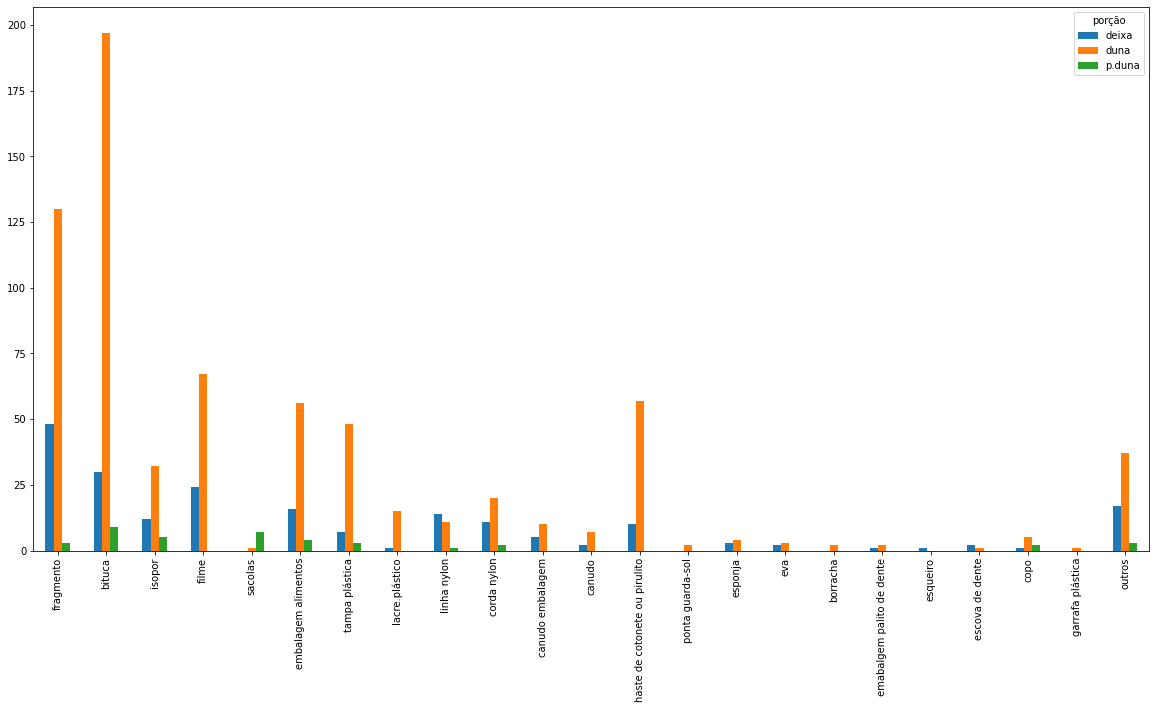

In [9]:
local.plot.bar(figsize=(20, 10));

In [10]:
grouped = macro.groupby(pd.Grouper(freq="Y"))

g = grouped.sum()
g

,itens_total,fragmento,bituca,isopor,filme,sacolas,embalagem alimentos,tampa plástica,lacre.plástico,linha nylon,...,ponta guarda-sol,esponja,eva,borracha,emabalgem palito de dente,esqueiro,escova de dente,copo,garrafa plástica,outros
data,,,,,,,,,,,,,,,,,,,,,
2018-12-31,61,19.0,2.0,1.0,4.0,0.0,5.0,3.0,0.0,2.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0
2019-12-31,862,160.0,222.0,46.0,81.0,8.0,69.0,54.0,16.0,24.0,...,2.0,7.0,2.0,2.0,2.0,1.0,3.0,7.0,0.0,47.0
2020-12-31,31,2.0,12.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
